### CONTEXT

- DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government.

### PROBLEM DEFINITION

- What are the different factors that influence the income of an individual?

- Is there a good predictive model for income that exists? What does the performance assessment look like for such a model?

### OBJECTIVE

- Develop a good income prediction model and assess it's performance

In [1]:
# importing the libraries that will be needed in building the model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import (
precision_score,
accuracy_score,
recall_score,
f1_score)
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#remove warnings

import warnings

warnings.filterwarnings('ignore')


In [3]:
# read csv file

df = pd.read_csv("who_data.csv.crdownload")

In [4]:
#check number of columns and rows

df.shape

(9288, 15)

- There are 9288 rows and 15 columns in this dataset

In [5]:
#check column names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

- These are the column names in our dataset

In [6]:
#check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     9288 non-null   int64 
 1   workclass               9288 non-null   object
 2   fnlwgt                  9288 non-null   int64 
 3   education               9288 non-null   object
 4   education_no_of_years   9288 non-null   int64 
 5   marital_status          9288 non-null   object
 6   occupation              9288 non-null   object
 7   relationship            9288 non-null   object
 8   race                    9288 non-null   object
 9   sex                     9288 non-null   object
 10  capital_gain            9288 non-null   int64 
 11  capital_loss            9288 non-null   int64 
 12  working_hours_per_week  9288 non-null   int64 
 13  native_country          9288 non-null   object
 14  salary                  9287 non-null   object
dtypes: i

- 6 of the columns are integer data types and 9 are object data types 

In [7]:
# check for missing values

df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    1
dtype: int64

- There no missing values in all our features except for salary. 

- There is 1 missing value in the salary feature

In [8]:
#randomly select 5 samples in our data

df.sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
483,41,Private,193626,HS-grad,9,Married-spouse-absent,Craft-repair,Unmarried,White,Female,0,0,40,United-States,<=50K
7335,40,Private,42703,Assoc-voc,11,Divorced,Craft-repair,Unmarried,White,Female,0,0,40,United-States,<=50K
1806,59,Private,183606,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
3462,31,Private,329301,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,55,United-States,<=50K
8124,36,Private,172104,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Other,Male,0,0,40,India,>50K


- From a quick glance at our data we can see that though there are no missing values but there are question marks in the workclass, occupation and native country columns

In [9]:
#replace all "?" in the dataset with np.nan

df.replace(" ?", np.nan, inplace = True)

In [10]:
df.isnull().sum()

age                         0
workclass                 549
fnlwgt                      0
education                   0
education_no_of_years       0
marital_status              0
occupation                550
relationship                0
race                        0
sex                         0
capital_gain                0
capital_loss                0
working_hours_per_week      0
native_country            167
salary                      1
dtype: int64

- After replacing all the question marks with nan, we now have 549 missing values in workclass, 550 missing values in occupation, 167 missing values in native country and 1 missing value in salary


In [11]:
# define a function to replace missing values with mode for  workclass and occupation

def fill_with_mode(df, columns):
    for  col in columns:
        df[col].fillna(df[col].mode()[0], inplace = True)



In [12]:
fill_with_mode(df, ["workclass", "occupation", "native_country"])

In [13]:
# Check for missing values

df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    1
dtype: int64

In [14]:
# Drop missing row in salary since it's just one

df.dropna(subset = ["salary"], inplace = True)

# Reset the row index

df.reset_index(drop = True, inplace = True)

In [15]:
# Sanity Check

df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

- Our dataset is void of missing values

In [16]:
# check for duplicates

df.duplicated().sum()

3

- There are 3 duplicated rows in the dataset

In [17]:
# Remove duplicate rows

df.drop_duplicates(inplace = True)

# Reset the row index

df.reset_index(drop = True, inplace = True)



In [18]:
# Sanity Check

df.duplicated().sum()

0

###  DESCRIPTIVE STATISTICS

In [19]:
# Check for the descriptive statistics

df.describe(include = "all")

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
count,9284.000000,9284,9.284000e+03,9284,9284.000000,9284,9284,9284,9284,9284,9284.000000,9284.000000,9284.000000,9284,9284
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,7001,NaN,3004,NaN,4249,1720,3734,7949,6224,NaN,NaN,NaN,8478,7046
mean,38.413184,NaN,1.902018e+05,NaN,10.071413,NaN,NaN,NaN,NaN,NaN,1078.654459,89.443774,40.549224,NaN,NaN
std,13.576381,NaN,1.059719e+05,NaN,2.549851,NaN,NaN,NaN,NaN,NaN,7377.407844,404.272834,12.291850,NaN,NaN
min,17.000000,NaN,1.930200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.179965e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.786730e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.384190e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


- In this dataset, the age range spans from 17 to 90 years, with the youngest person being 17 and the oldest being 90. Approximately 25% of individuals in the dataset are 28 years old or younger, while 75% are 47 years old or younger.


- The average final weight is approximately 190,202. The maximum recorded weight is about 1,226,583, while the minimum weight is around 19,302.


- There are 7,001 individuals working in the Private sector.


- The number of High School graduates in the dataset is 3,004.


- The highest level of education in years ranges from a minimum of 1 year to a maximum of 16 years. The median education duration is 10 years, while the mean is approximately 10.07 years.


- A total of 4,249 individuals in the dataset are classified as Married-civ-spouse.


- The most common occupation is Prof-specialty.


- Among the data, the majority of individuals are classified as Husbands, totaling approximately 3,734.


- The largest racial group is "WHITE" with 7,949 individuals in the dataset.


- Among the sexes recorded in the dataset, the highest count is for males, with 6,224 males.


- The maximum capital gain is 99,999 dollars and the minimum is 0 dollars.


- The maximum capital loss recorded is 4,356 dollars, while the minimum is 0 dollars.


- The highest number of working hours per week is 99 hours, and the lowest is 1 hour. On average, individuals work approximately 40.54 hours per week.


- A total of 8,478 individuals in the dataset are from the United States.


- A majority of individuals in the dataset, around 7,046, earn 50,000 dollars or below, indicating an underprivileged status.




In [20]:
# Change our target feature into a class of  0 and 1, where 0 is for those earning <= 50k and 1 is for those earning >50k

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["salary"] = label_encoder.fit_transform(df["salary"])


In [21]:
# Check the distribution of the class

df["salary"].value_counts()

0    7046
1    2238
Name: salary, dtype: int64

In [22]:
#import plot functions from the utils

from utils import histogram_boxplot
from utils1 import labeled_barplots

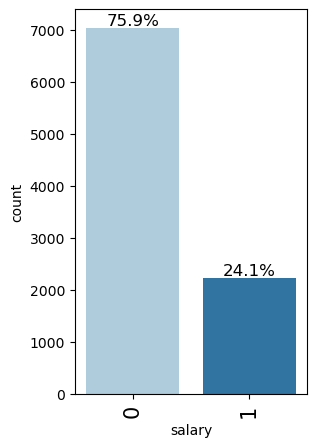

In [23]:
# Plotting a barplot to show the distribution of Salary

labeled_barplots(data = df, feature = "salary", perc = True)


- 75.95 of the people in our data are underprivileged, earning 50,000 dollars and below
- Only 24.1% are privileged, earning above 50,000 dollars

### UNIVARIATE ANALYSIS


In [24]:
#check for descriptive statistics of age

df.age.describe()

count    9284.000000
mean       38.413184
std        13.576381
min        17.000000
25%        28.000000
50%        37.000000
75%        47.000000
max        90.000000
Name: age, dtype: float64

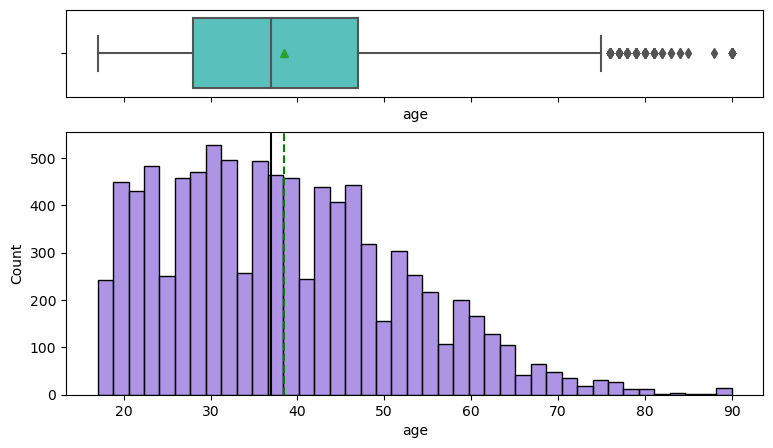

In [25]:
# plot histogram of age

histogram_boxplot(data = df, feature = "age")

- The age columns is slightly rightly skewed and there are outliers after the upper quartile


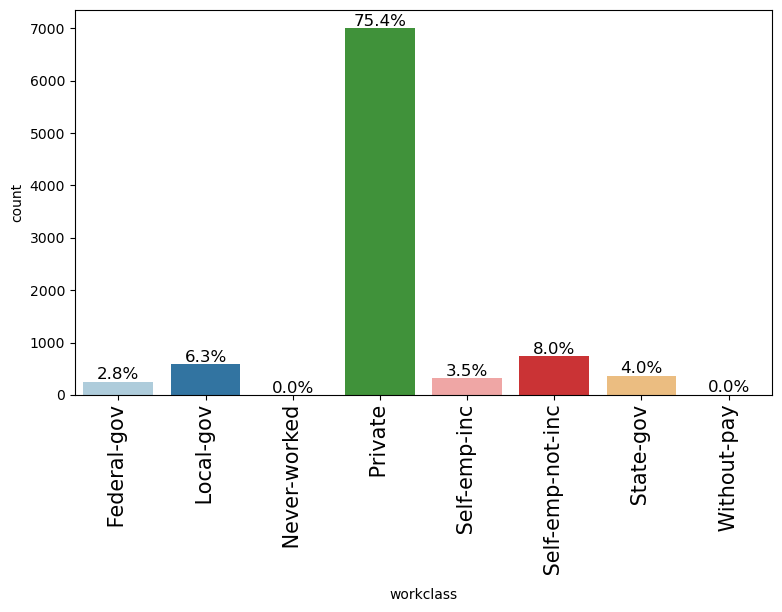

In [26]:
# plot barplot of workclass

labeled_barplots(data = df, feature = "workclass", perc = True)

- The "Private" workclass is the highest workclass with over 75.4% followed by "Self-emp-not-inc" with 8%. 
- There are no people in the "Never-worked" and "without-pay" workclass. That means everyone in our data has worked and has earned a salary

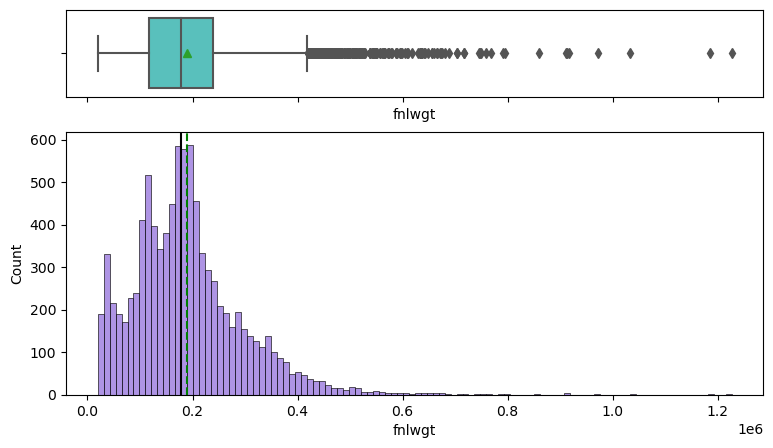

In [27]:
# plot histogram and boxplot of fnlwgt

histogram_boxplot(data = df, feature = "fnlwgt")

- The final weight is rightly distributed with so many outliers after the upper quartile

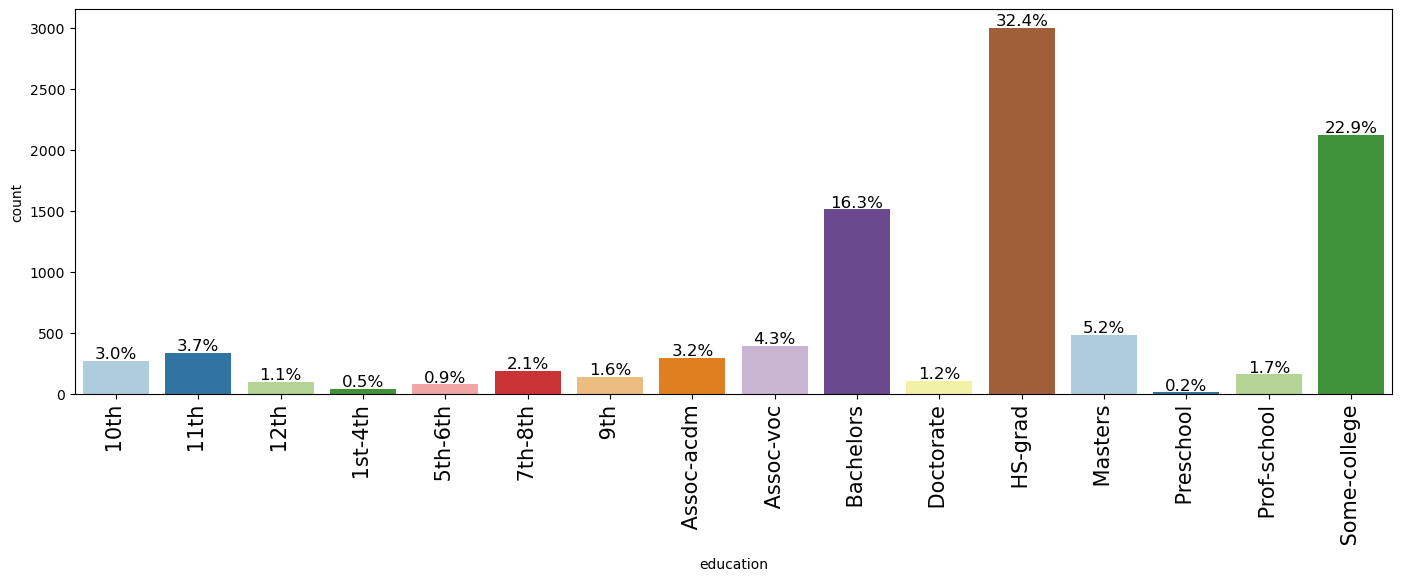

In [28]:
# plot barplot of education

labeled_barplots(data = df, feature = "education", perc = True)

- "HS-grad" is the highest for the education class with 32.4%, followed by the "Some_college" which has 22.9% and "Bachelors" which has 16.3%. This means that most people in our data have gone to High school or have gone to college or have a bachelors degree


- The least education is the "Preschool" which has only 0.2%, followed by the "1-4th" grade which has 0.5%

In [29]:
# check descriptive analysis of education no of years

df.education_no_of_years.describe()

count    9284.000000
mean       10.071413
std         2.549851
min         1.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        16.000000
Name: education_no_of_years, dtype: float64

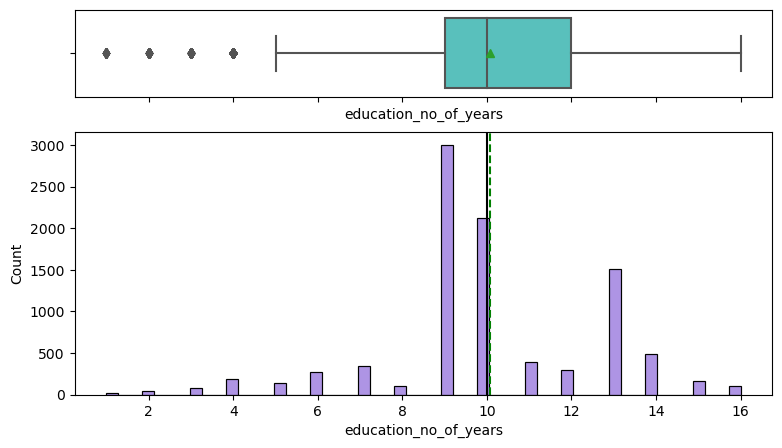

In [30]:
# plot histogram and boxplot of education_no_of_years

histogram_boxplot(data = df, feature = "education_no_of_years")

- The "education_no_of_years" is slighty leftly skewed with outliers on after the lower quartile.

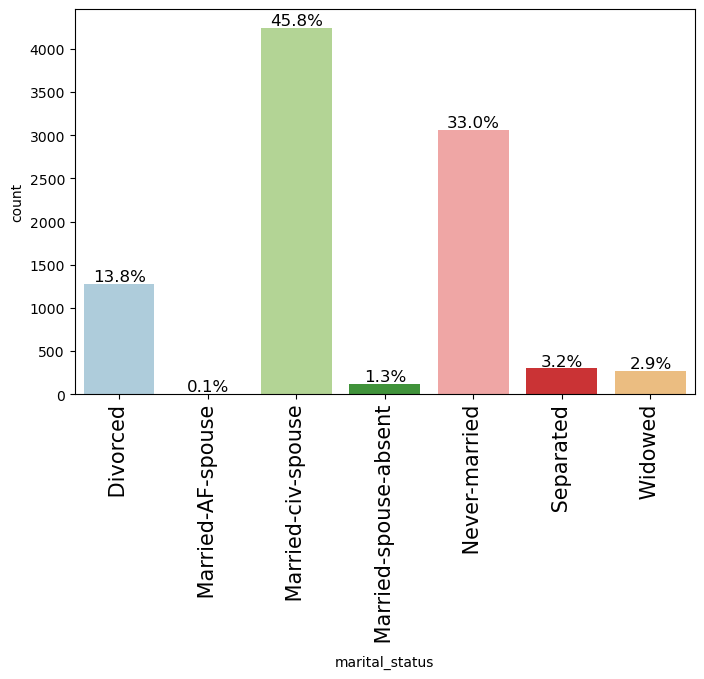

In [31]:
# plot barplot of marital_status

labeled_barplots(data = df, feature = "marital_status", perc = True)

- Most people in our data are under the "Married-civ-spouse" with 45.8% and this is closely followed by the "Never-married" marital status which has 33.0%
- 13.8% are 'Divorced" and 3.2% are "Separated"
- Only 0.1% are "Married_AF_spouse"

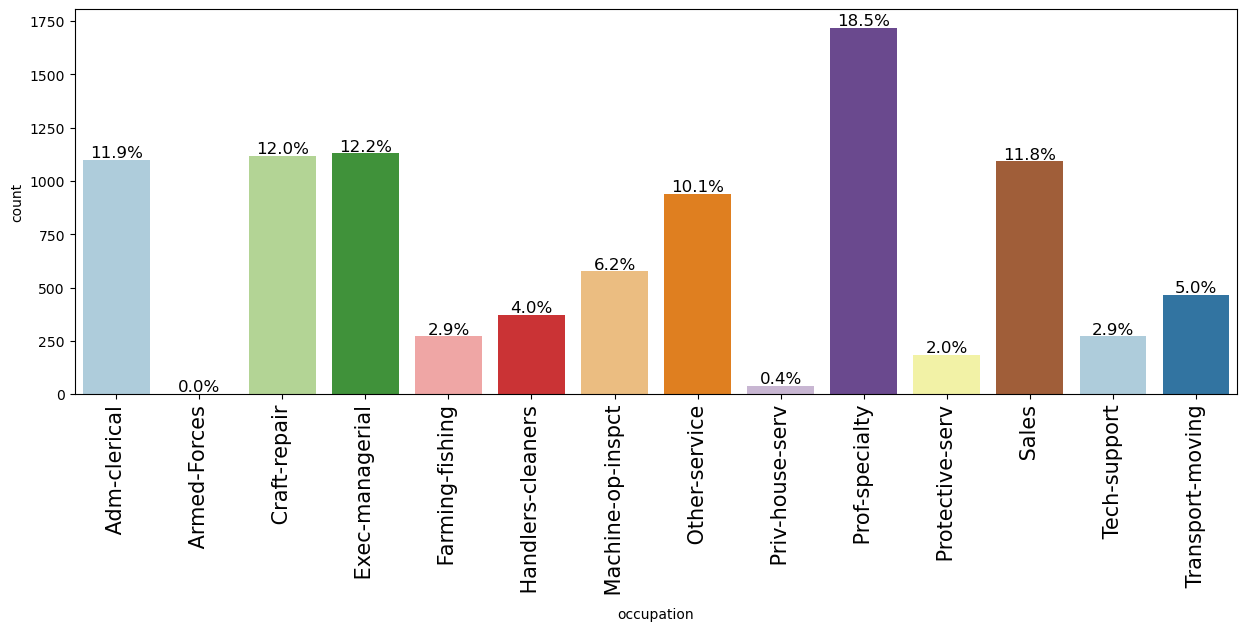

In [32]:
# plot barplot of occupation

labeled_barplots(data = df, feature = "occupation", perc = True)

- The highest occupation is the "Prof-specialty" which hass 18.5% followed by the "Exec-managerial" and the "Craft_repair" which have 12.2 % and 12% respectively.
- The least occupation is the "Armed-Forces" which has 0.0% followed by the "Priv-house-serv" which has 0.4%

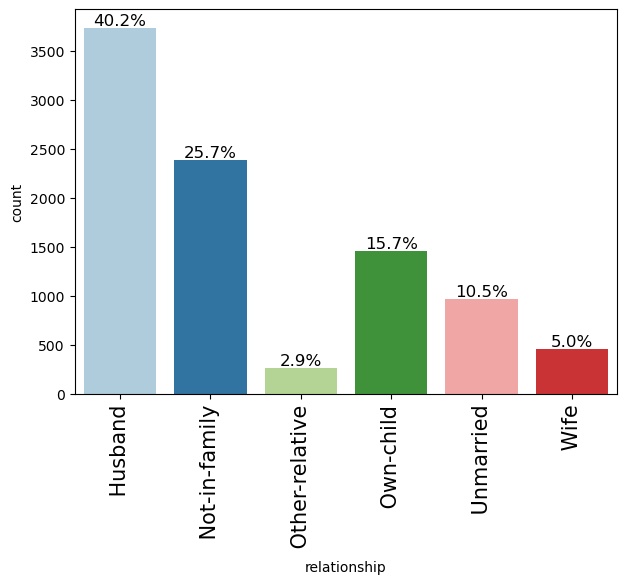

In [33]:
# plot barplot of relationship

labeled_barplots(data = df, feature = "relationship", perc = True)

- Husbands is the highest category in relationship with 40.2%, closely followed by "Not-in-family" which has 25.7%
-  "Other-relative" is the least in the relationship category

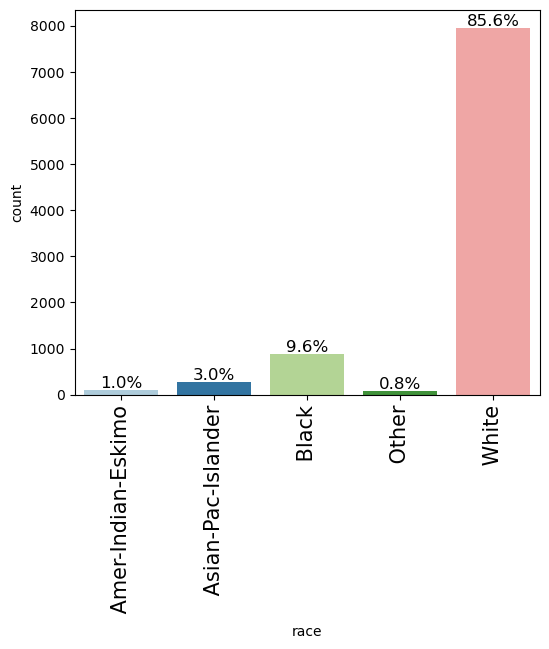

In [34]:
# plot barplot of race

labeled_barplots(data = df, feature = "race", perc = True)

- The highest race in our data is 'White" with 85.6% and the least is "Amer-Indian_Eskimo" with 1%

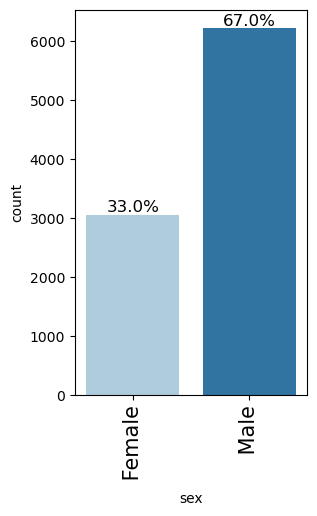

In [35]:
labeled_barplots(data = df, feature = "sex", perc = True)

- There are more males than females. 67% males and 33% females

In [36]:
# descriptive statistics of capital gain

df.capital_gain.describe()

count     9284.000000
mean      1078.654459
std       7377.407844
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

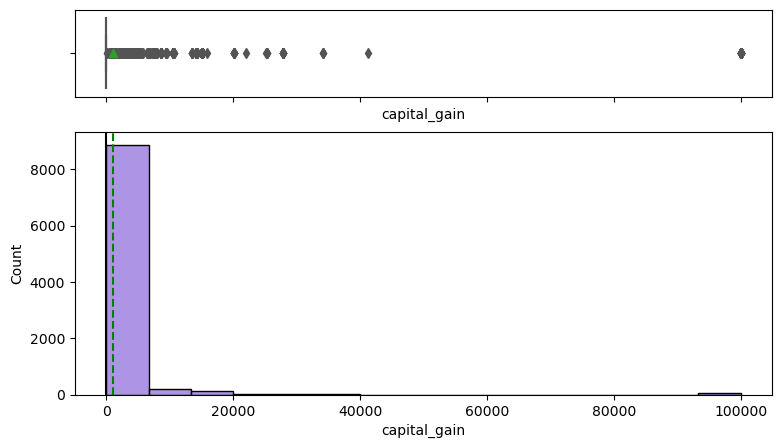

In [37]:
# histogram and boxplot of capital gain

histogram_boxplot(data = df, feature = "capital_gain")

- The capital gain is slightly rightly skewed with outliers after the upper quartile

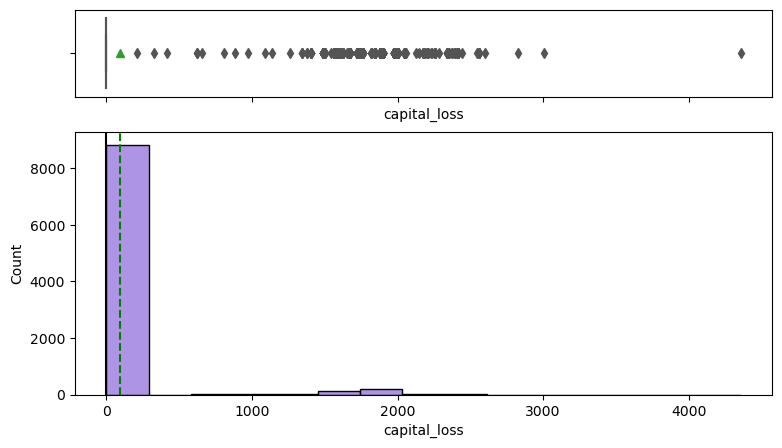

In [38]:
# histogram and boxplot of capital loss

histogram_boxplot(data = df, feature = "capital_loss")

- The capital loss is rightly skewed with outliers after the upper quartile

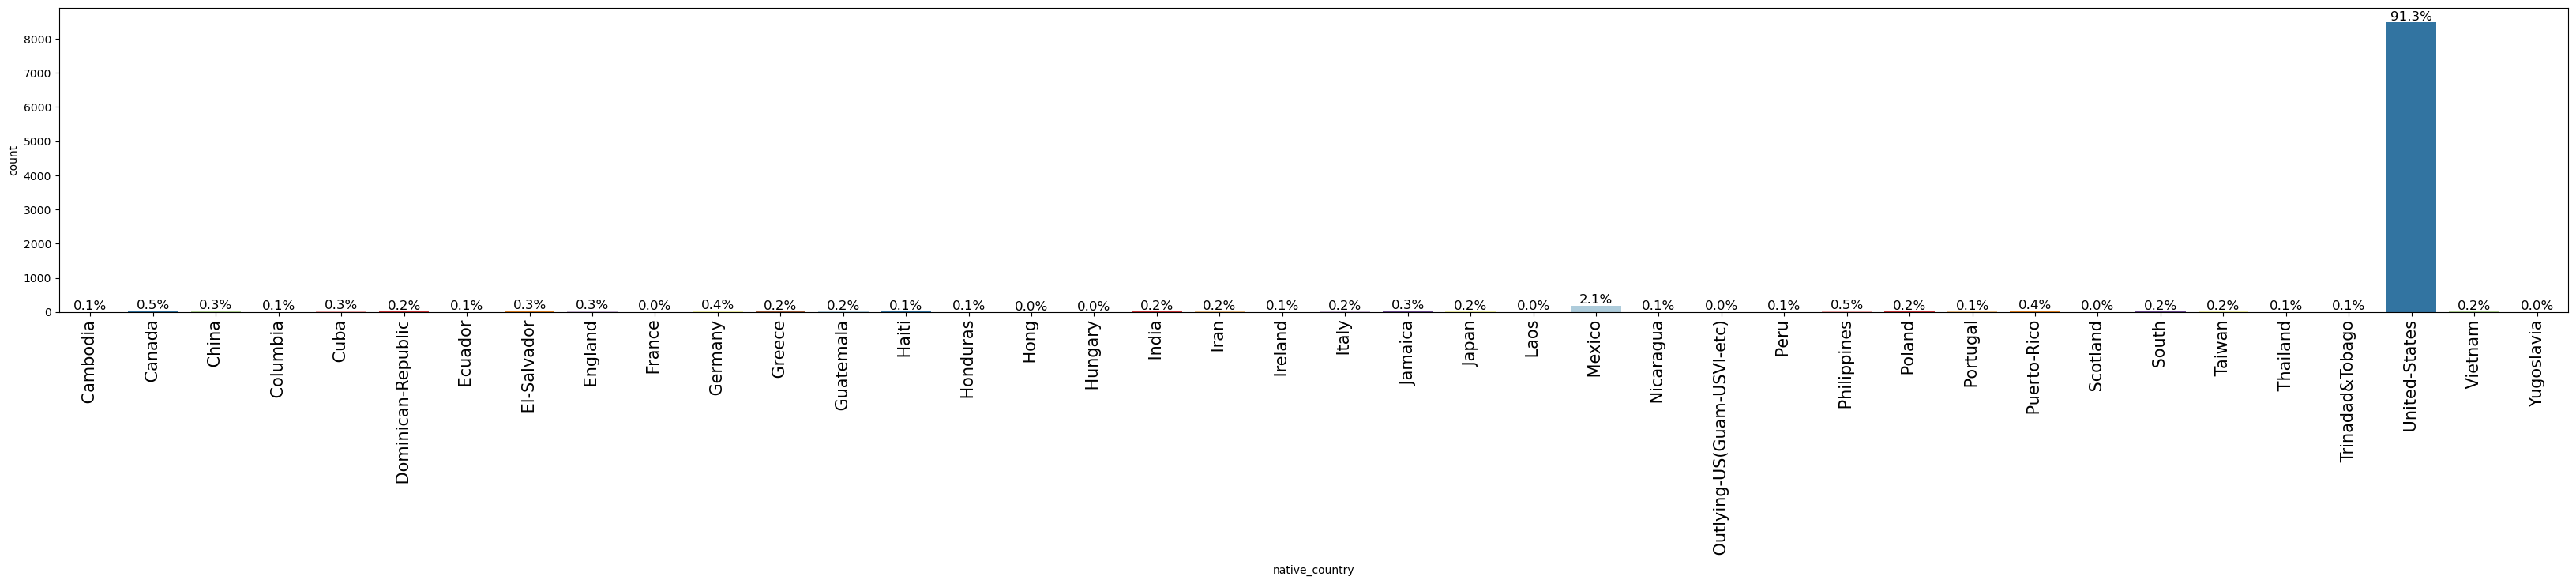

In [39]:
# barplot of native country

labeled_barplots(data = df, feature = "native_country", perc = True)

- The highest native country in our data is the "United-States" with over 91.3%

In [40]:
# first five samples of our data

df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Bivariate Analysis

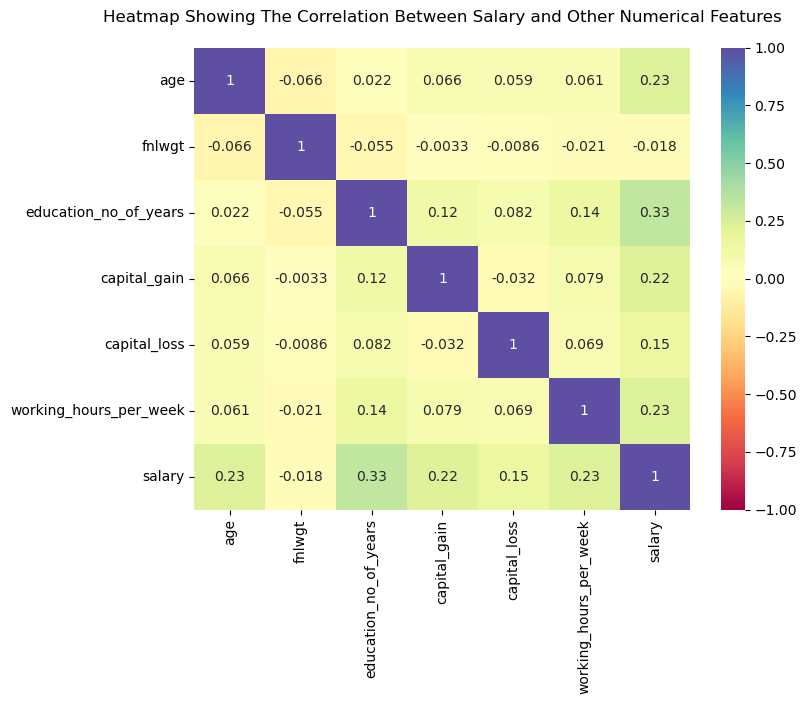

In [41]:
# check for correlation

mat_cor = df.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral')
plt.title("Heatmap Showing The Correlation Between Salary and Other Numerical Features\n")
plt.show()

- From the heatmap above, we can see that there is a slightly positive relationship between the age, education number of years, the capital gain, the capital loss, the working hours per week and the salary. This means that has the variables in the features increase, the salary will increase and as the variables reduce the salary will reduce


- However, there seems to be a negative relationship between the final weight and the salary. This means that, as the final weight increases, the salary will decrease.


- We can also observe that there is a correlation between the education number of years and the capital gain and working hours per week. This is very minimal, so it won't have much effect on our model.



### Outlier Detection and Handling

- Here we will remove all the outliers in the columns by clipping any value left to the lower whisker, to the lower whisker and any value on the right of the upper whisker to the upper whisker

In [42]:
# assign numeric features to num_data

num_data = df.select_dtypes(include = "number")

num_data.drop("salary", axis = 1, inplace = True)

num_data.columns

Index(['age', 'fnlwgt', 'education_no_of_years', 'capital_gain',
       'capital_loss', 'working_hours_per_week'],
      dtype='object')

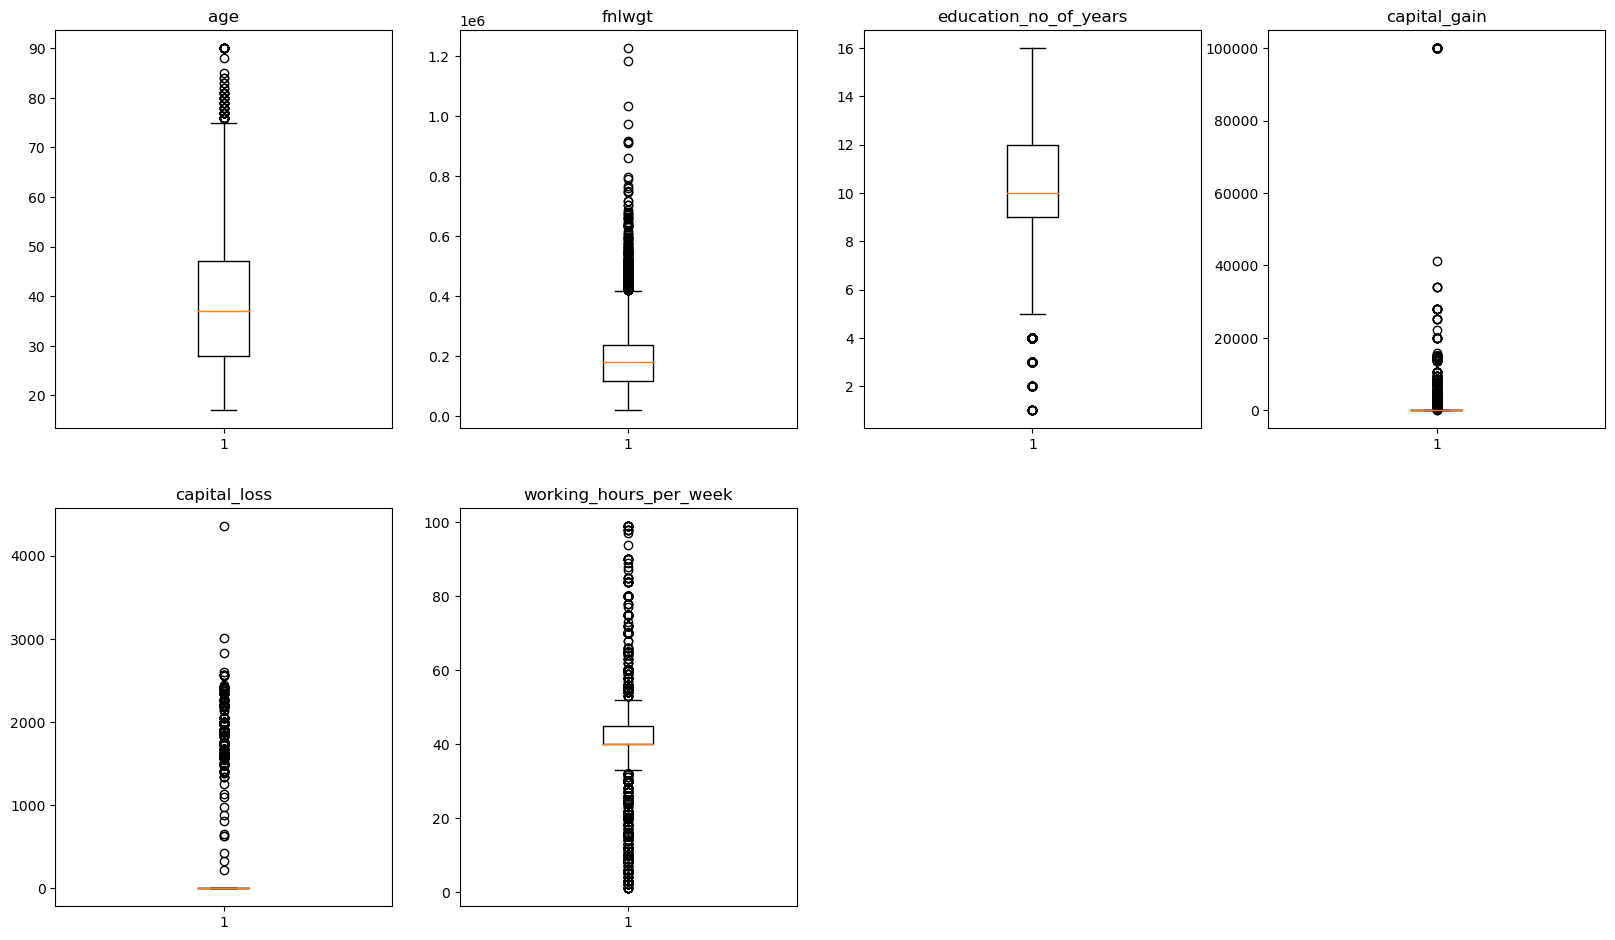

In [43]:
# outlier detection using boxplot

plt.figure(figsize = (20, 30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)
    
plt.show()

In [44]:
# Remove all outliers

def treat_outliers(df, col):
    """
    treat outliers in variable
    col: str, name of the numerical variable
    df: dataframe
    
    """
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75) # 75th quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)
    return df

In [45]:
df = treat_outliers_all(df, num_data)

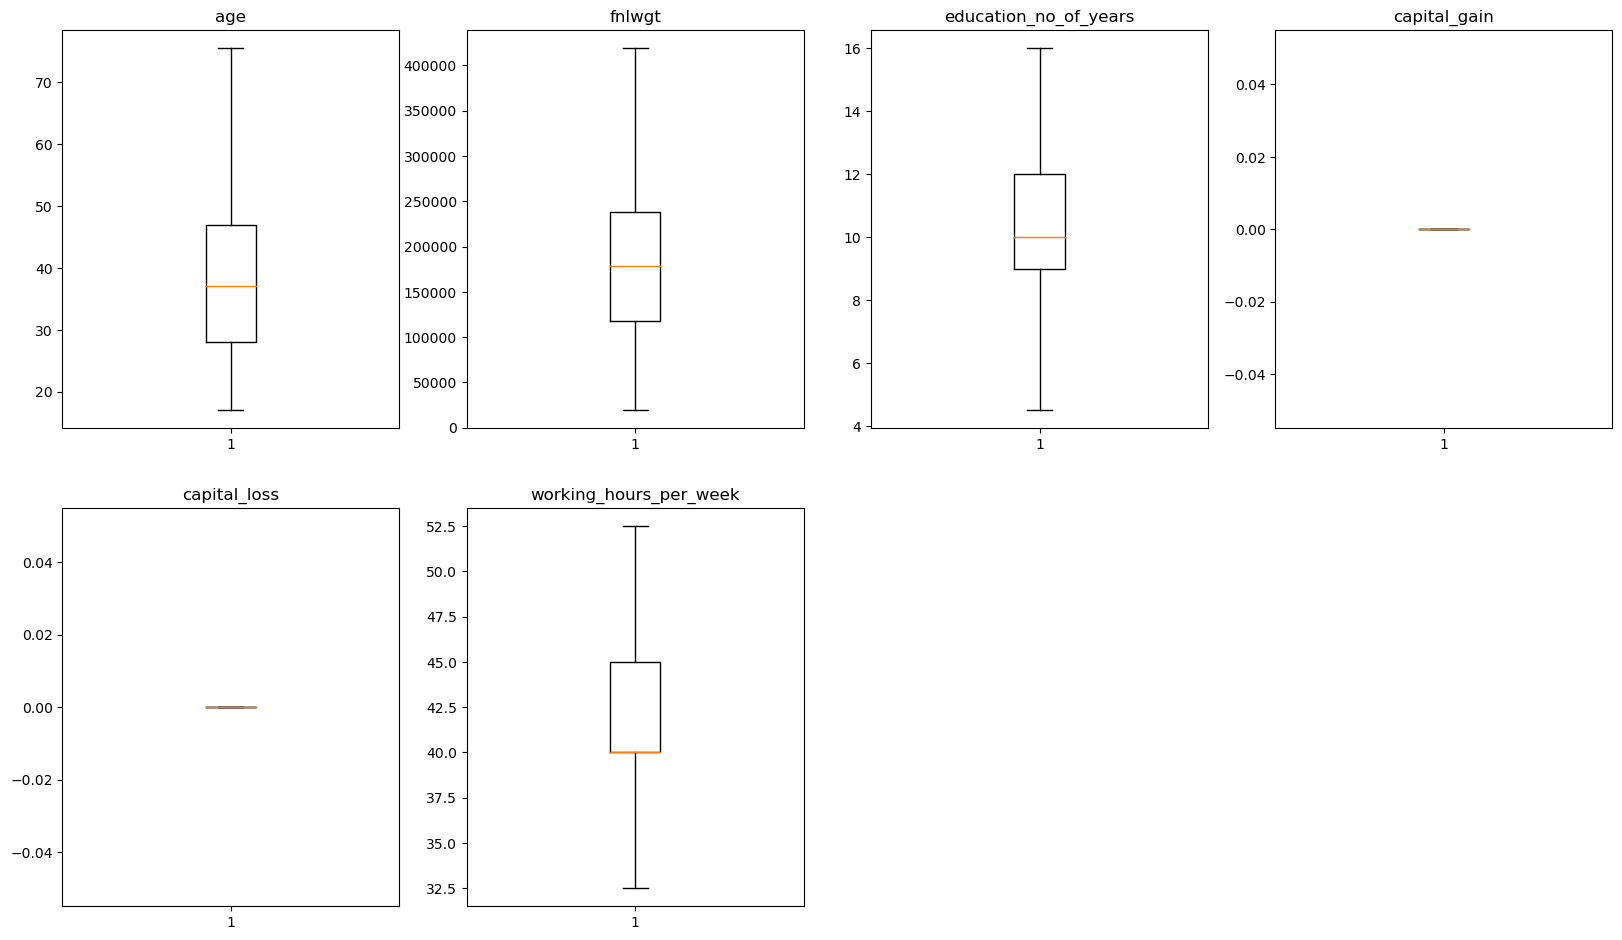

In [46]:
# Sanity Check

# outlier detection using boxplot

plt.figure(figsize = (20, 30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)
    
plt.show()

### Feature Engineering

- Here we will turn all categorical variables to numerical variables using OneHotEncoding
- Before that we will reduce the variables in some categorical variables, so has not to have too many columns

### Treating the Native Country feature

In [47]:
# Group the variables in the native_country column

def group_native_country(data):
    for i in range(len(data)):
        if data.loc[i, 'native_country'] == ' United-States':
            data.loc[i, 'native_country'] = ' United-States'
        else:
            data.loc[i, 'native_country'] = ' Others'
    return data


In [48]:
group_native_country(df)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Others,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9279,52.0,Private,256916.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,0
9280,46.0,Private,73541.0,10th,6.0,Divorced,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
9281,23.0,Private,109952.0,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,52.5,United-States,0
9282,54.0,Private,197975.0,5th-6th,4.5,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,51.0,United-States,0


In [49]:
# sanity check

df.native_country.value_counts()

 United-States    8478
 Others            806
Name: native_country, dtype: int64

### Treating the Occupation Feature


In [50]:
# occupation value counts

df.occupation.value_counts()

 Prof-specialty       1720
 Exec-managerial      1130
 Craft-repair         1118
 Adm-clerical         1101
 Sales                1093
 Other-service         941
 Machine-op-inspct     576
 Transport-moving      467
 Handlers-cleaners     371
 Farming-fishing       271
 Tech-support          271
 Protective-serv       184
 Priv-house-serv        39
 Armed-Forces            2
Name: occupation, dtype: int64

In [51]:
# set threshold to 1000
threshold = 1000

# get the value count of occupation
val_c = df["occupation"].value_counts()


# filter the occupation to only those with at least 900 occurrence
occupation_list = val_c[val_c.values >= threshold].index.tolist()

In [52]:
occupation_val = []

for i in range(df.shape[0]):  # iterate over all rows in data
    txt = df.occupation.values[i]  # getting the values in occupation column
    flag = 0  # flag variable
    for item in occupation_list:  # iterate over the list of occupation considered
        if item in txt and flag == 0:  # checking if occupation name is in the row
            occupation_val.append(item)
            flag = 1
    if flag == 0:  # if the row values is different from the list of occupation considered
        occupation_val.append("Other-service")

In [53]:
df["occupation_sorted"] = occupation_val

In [54]:
df["occupation_sorted"].value_counts()

Other-service       3122
 Prof-specialty     1720
 Exec-managerial    1130
 Craft-repair       1118
 Adm-clerical       1101
 Sales              1093
Name: occupation_sorted, dtype: int64

### Treating the Education Feature

In [55]:
# value counts for education

df.education.value_counts()

 HS-grad         3004
 Some-college    2123
 Bachelors       1514
 Masters          486
 Assoc-voc        395
 11th             339
 Assoc-acdm       299
 10th             276
 7th-8th          192
 Prof-school      162
 9th              145
 Doctorate        107
 12th             101
 5th-6th           80
 1st-4th           45
 Preschool         16
Name: education, dtype: int64

In [56]:
# set threshold to 400
threshold = 400

# get the value count of education
val_c = df["education"].value_counts()


# filter the educationto only those with at least 400 occurrence
education_list = val_c[val_c.values >= threshold].index.tolist()

In [57]:
education_val = []

for i in range(df.shape[0]):  # iterate over all rows in data
    txt = df.education.values[i]  # getting the values in education column
    flag = 0  # flag variable
    for item in education_list:  # iterate over the list of education considered
        if item in txt and flag == 0:  # checking if education name is in the row
            education_val.append(item)
            flag = 1
    if flag == 0:  # if the row values is different from the list of education considered
        education_val.append("Others")

In [58]:
# assign education_val to a new variable called education_sorted

df["education_sorted"] = education_val

In [59]:
df["education_sorted"].value_counts()

 HS-grad         3004
Others           2157
 Some-college    2123
 Bachelors       1514
 Masters          486
Name: education_sorted, dtype: int64

In [60]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary', 'occupation_sorted', 'education_sorted'],
      dtype='object')

## Model Building

- Here we will import the required libraries, split our data set, create dummy vairables
- Build the model and check the peformance

In [61]:
#select features and target

X = df[["age", "workclass", "fnlwgt", "education_sorted", "education_no_of_years", "marital_status", "occupation_sorted", "relationship", "race", 
        "sex", "capital_gain", "capital_loss", "working_hours_per_week", "native_country", ]]

y = df["salary"]

In [62]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education_sorted',
       'education_no_of_years', 'marital_status', 'occupation_sorted',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'working_hours_per_week', 'native_country'],
      dtype='object')

In [63]:
# sanity check

X.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education_sorted          0
education_no_of_years     0
marital_status            0
occupation_sorted         0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
dtype: int64

### Convert categorical features to numerical data using OneHot Encoding

In [64]:
# create dummies from categorical variables

X = pd.get_dummies(X, drop_first = True)

X.head()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_country_ United-States
0,39.0,77516.0,13.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,50.0,83311.0,13.0,0.0,0.0,32.5,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


### Split Data

- Here we will split our data into the train set and test set

In [65]:
# split data into train and test set

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [66]:
# check percentage of y data class

y.value_counts(normalize = True)

0    0.75894
1    0.24106
Name: salary, dtype: float64

In [67]:
from sklearn.preprocessing import MinMaxScaler # import MinMaxScaler for normalization

scaler = MinMaxScaler()

x_train_sd = scaler.fit_transform(x_train) 
x_test_sd = scaler.transform(x_test)

In [68]:
# build model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0, class_weight = {1:0.9, 0:0.1})

log_reg.fit(x_train_sd, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, random_state=0)

### Model Performance Check

In [69]:
from utils1 import model_performance_classification

In [70]:
# with a class weight 

log_reg.score(x_train_sd, y_train)

0.6757775683317625

- With a class weight we have an accuracy of 0.68

In [71]:
# check prediction probability for x_test

log_reg.predict_proba(x_test_sd)

array([[0.11766624, 0.88233376],
       [0.36555355, 0.63444645],
       [0.24611931, 0.75388069],
       ...,
       [0.2129946 , 0.7870054 ],
       [0.97529736, 0.02470264],
       [0.187849  , 0.812151  ]])

- According to the predicted probabilities, the model indicates that the first instance in the test dataset is more likely to belong to the 0 class ("salary <=50K") with a probability of approximately 1, rather than belonging to the 1 class ("salary >50K") with a probability of approximately 0.


- For the second instance in the test dataset, the model predicts a higher probability of approximately 0.85 for it to belong to the 1 class ("salary >50K"), compared to a probability of approximately 0.15 for it to belong to the 0 class ("salary <=50K").

In [72]:
# building the model without class weight

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0)

log_reg.fit(x_train_sd, y_train)

log_reg.score(x_train_sd, y_train)

0.8308873030833446

- Without class weight, our model accuracy increased from 0.68 to 0.83

### Confusion Matrix

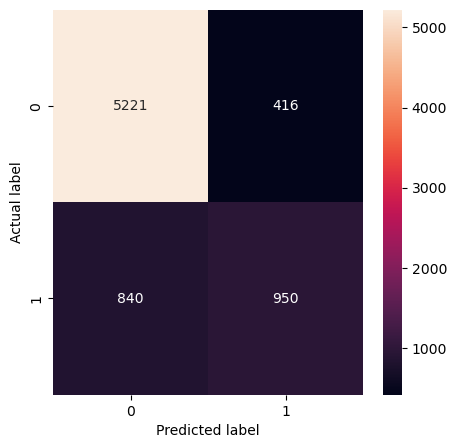

In [73]:
# plotting confusion matrix for the normalized training data

log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)



- Here's a breakdown of the interpretation of our confusion matrix:


- True Positives (TP): This means that 963 people who earn salary > 50k were correctly predicted as earning "salary >50K".


- False Positives (FP): This means 418 people who do not earn salary > 50k were wrongly predicted as earning salary >50k


- False Negatives (FN): This means that 827 who earn "salary >50K" were wrongly predicted by our model as not earning earning "salary > 50K"


- True Negatives (TN): 5219 people who do not earn "salary <=50K" were correctly predicted by our model as earning salary of 50,000 dollars or less  

In [74]:
# logistic regression for train data

log_reg_train

,Accuracy,Recall,Precision,F1-score
0,0.830887,0.530726,0.695461,0.602028


- For imbalanced data, when a new dataset similar to the one used for training is given, the model achieves an accuracy rate of 83% in predicting the salary correctly.


- With a recall of 54%, this means that out of all the people who earn above 50k in the data our model only got 54% of them correctly.


- A precision of 0.697321 means that out of all people predicted to earn salary above 50k by the model, the model only got 69.73% of them correctly

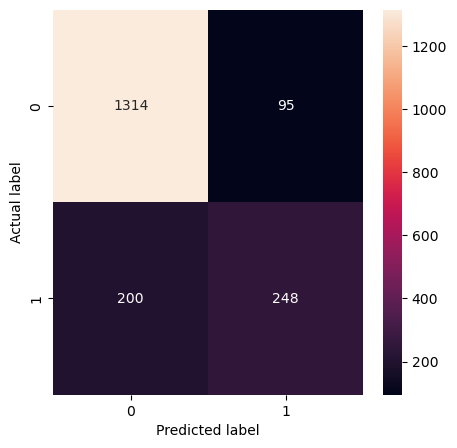

,Accuracy,Recall,Precision,F1-score
0,0.841142,0.553571,0.723032,0.627054


In [75]:
# logistic regression for test data

log_reg_test = model_performance_classification(log_reg, x_test_sd, y_test)

log_reg_test

- The accuracy, recall and precision for the test data is similar to that of the training data, though the recall and precision are low

### Model Improvement

- Since the organization is focused on bringing about a change in the lives of underprivileged sections of society we are going to focus on the Precision metric. This means we will be reducing the number of people who are wrongly predicted as earning salary >50k

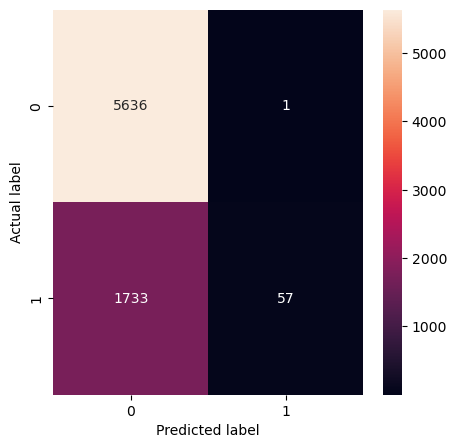

,Accuracy,Recall,Precision,F1-score
0,0.766528,0.031844,0.982759,0.061688


In [76]:
# Change the Metric by increasing threshold

log_reg2_train = model_performance_classification(log_reg, x_train_sd, y_train, threshold = 0.9)

log_reg2_train

- Our Precision has increased from 69.7% to 91.7%. This means that only 7 people whso earn salary of 50,000 dollars or less where wrongly predicted as earning salary of 50,000 dollars and above

In [77]:
# Balancing the data

from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, SMOTE 

In [78]:
#using smote to balance the data

smote = SMOTE(random_state = 0)

X_sm, y_sm = smote.fit_resample(X, y)

In [79]:
#checking for balance

y_sm.value_counts(normalize = True) 

0    0.5
1    0.5
Name: salary, dtype: float64

In [80]:
# split the balanced data

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2)

In [81]:
# normalizing the data

x_train_sm_sd = scaler.fit_transform(x_train_sm)
x_test_sm_sd = scaler.transform(x_test_sm)

In [82]:
#build our model

log_reg3 = LogisticRegression(random_state = 0)

log_reg3.fit(x_train_sm_sd, y_train_sm)

LogisticRegression(random_state=0)

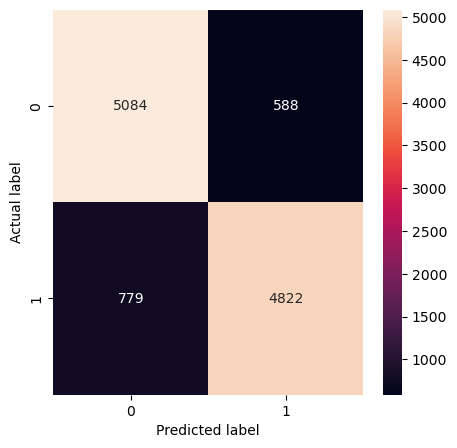

,Accuracy,Recall,Precision,F1-score
0,0.878737,0.860918,0.891312,0.875851


In [83]:
# logistic regression for the train data

log_reg3_train =  model_performance_classification(log_reg3, x_train_sm_sd, y_train_sm)

log_reg3_train

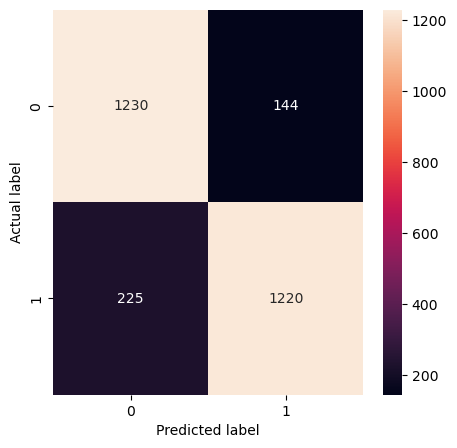

,Accuracy,Recall,Precision,F1-score
0,0.869103,0.844291,0.894428,0.868637


In [84]:
# logistic regression on the test data

log_reg3_test =  model_performance_classification(log_reg3, x_test_sm_sd, y_test_sm)

log_reg3_test

- Our model generalizes well. The Precision in the test is 0.892 and that of the train is 0.889. The recall on the train is 0.859 and that of the test is 0.852, which is very close. 


- The values for the precision and recall are better than what we got before balancing the data


- The recall and precision for both train and test are close


- Also our accuracy on the train is 0.876 and that of the test is 0.873, still very close.



In [85]:
# weights

log_reg3.coef_

array([[ 1.45099014e+00,  1.88358862e-01,  2.31943776e+00,
         0.00000000e+00,  0.00000000e+00,  1.50328500e+00,
        -1.88244169e+00, -1.34446828e-02, -1.62733770e+00,
        -1.14280877e+00, -2.12408552e+00, -1.88759611e+00,
        -6.95959169e-02, -1.30948295e+00, -4.98773686e-01,
        -1.36038769e+00, -1.11535734e+00, -1.37202216e+00,
        -8.70299034e-01, -2.52286400e-01, -8.53731947e-01,
        -3.11574429e-03, -6.49423472e-01, -1.43292313e+00,
        -9.04514999e-01, -1.21731876e+00, -1.31487304e+00,
        -1.72121186e+00, -3.14418951e+00, -3.00461190e+00,
        -4.15814380e+00, -3.68298765e+00, -6.80430550e-02,
        -1.63721498e+00, -1.46980444e+00, -1.75614175e+00,
        -1.02704888e+00, -7.26575686e-02,  1.02935124e-01]])

In [86]:
# bias

log_reg3.intercept_

array([3.23185727])

In [87]:
# list(X.columns)

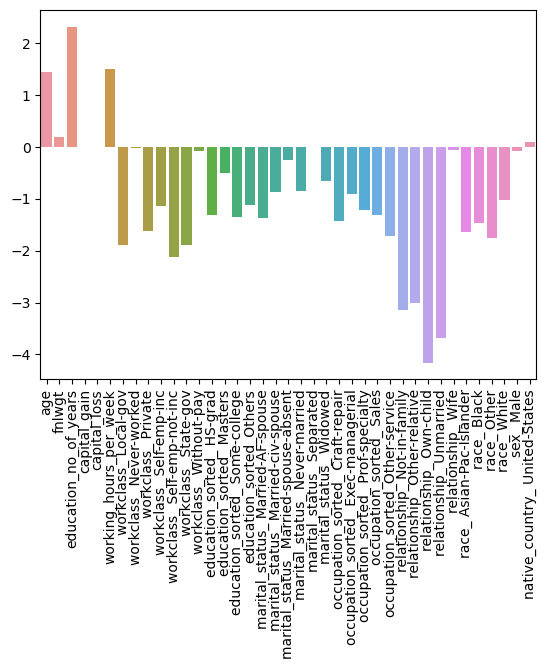

In [88]:
# barplot of logistic regression coefficients

sns.barplot(x = list(X.columns), y = log_reg3.coef_[0])
plt.xticks(rotation = 90)
plt.show()

Based on our logistic regression model and the corresponding plot, the top three factors that significantly influence an individual's income are as follows:

1) Age: The age of an individual plays a crucial role in determining their income. Generally, as individuals grow older, their income tends to increase.

2) Education - Number of years: The number of years of education completed by an individual has a substantial impact on their income. Higher levels of education often correlate with higher income levels.

3) Working hours per week: The number of hours an individual works per week is another influential factor. Generally, individuals who work more hours tend to have higher income.

### Decision Tree Model

In [89]:

#build the decision tree model

dec_tree = DecisionTreeClassifier(random_state = 0)

dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

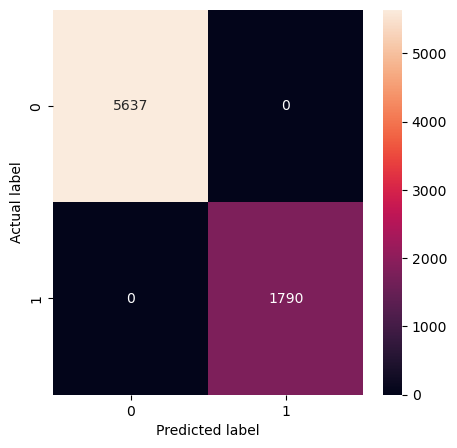

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [90]:
# check confusion matrix and model performance for train set

dec_df_train = model_performance_classification(dec_tree, x_train, y_train)

dec_df_train

In [91]:
# build decision tree for test set

dec_tree_test = DecisionTreeClassifier(random_state = 0)

dec_tree_test.fit(x_test, y_test)

DecisionTreeClassifier(random_state=0)

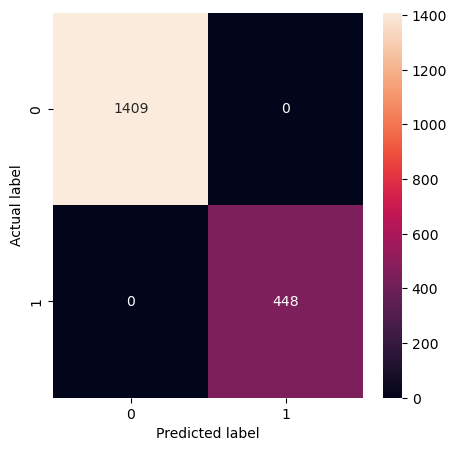

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [92]:
# check confusion matrix and decision tree model performance for test data

dec_df_test = model_performance_classification(dec_tree_test, x_test, y_test)

dec_df_test

 From our unbalnced data we get a perfect model with 100% accuracy, 100% recall and 100% precision for both train and test set. But we know it's near impossible to have such a perfect model. So we will balance the data and check performance

### Balance data using SMOTE

In [93]:
# use SMOTE to balance data

smote = SMOTE(random_state = 0)

X_sm, y_sm = smote.fit_resample(X, y)


In [94]:
# check smote y data set class percentage

y_sm.value_counts()

0    7046
1    7046
Name: salary, dtype: int64

In [95]:
# spilt data for smote data

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=0)

In [96]:
#build model

dec2_tree = DecisionTreeClassifier(random_state =0)
dec2_tree.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=0)

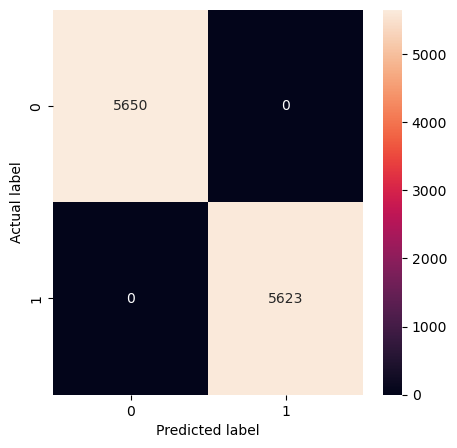

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [97]:
# check confusion matrix and model performance on train set on balanced data

dec2_traindf = model_performance_classification(dec2_tree, x_train_sm, y_train_sm)

dec2_traindf

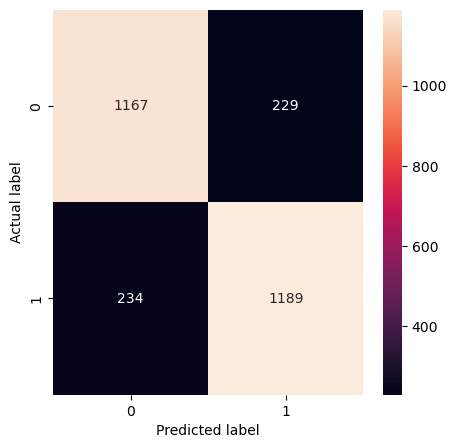

,Accuracy,Recall,Precision,F1-score
0,0.835757,0.835559,0.838505,0.837029


In [98]:
# check confusion matrix and model performance on test set on balanced data

dec2_testdf = model_performance_classification(dec2_tree, x_test_sm, y_test_sm)

dec2_testdf

 After balancing our data using SMOTE, our model is overfitting. The accuracy, recall and precision on the train set is above that of the test

### Tuning the Max Depth Parameter

In [99]:
# adjust max_depth to improve result on balanced data

dec3_tree = DecisionTreeClassifier(random_state =0, max_depth = 4)
dec3_tree.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=4, random_state=0)

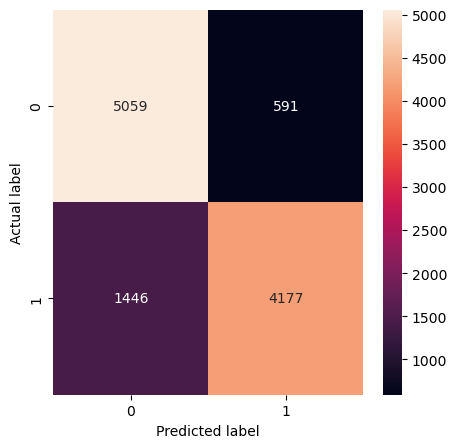

,Accuracy,Recall,Precision,F1-score
0,0.819303,0.742842,0.876049,0.803965


In [100]:
# check confusion matrix and model performance on train set 

dec3_traindf = model_performance_classification(dec3_tree, x_train_sm, y_train_sm)

dec3_traindf

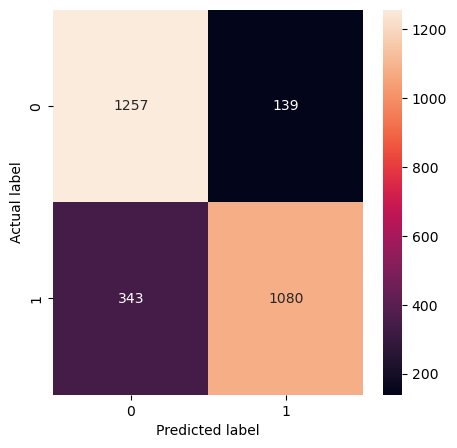

,Accuracy,Recall,Precision,F1-score
0,0.829017,0.75896,0.885972,0.817562


In [101]:
# check confusion matrix and model performance on test set 

dec3_testdf = model_performance_classification(dec3_tree, x_test_sm, y_test_sm)

dec3_testdf

After tuning the max depth parameter to 4, we now have a decision tree model that generalizing well. 

In [102]:
# import required libraries to plot decision tree graph

import pydotplus
from IPython.display import Image


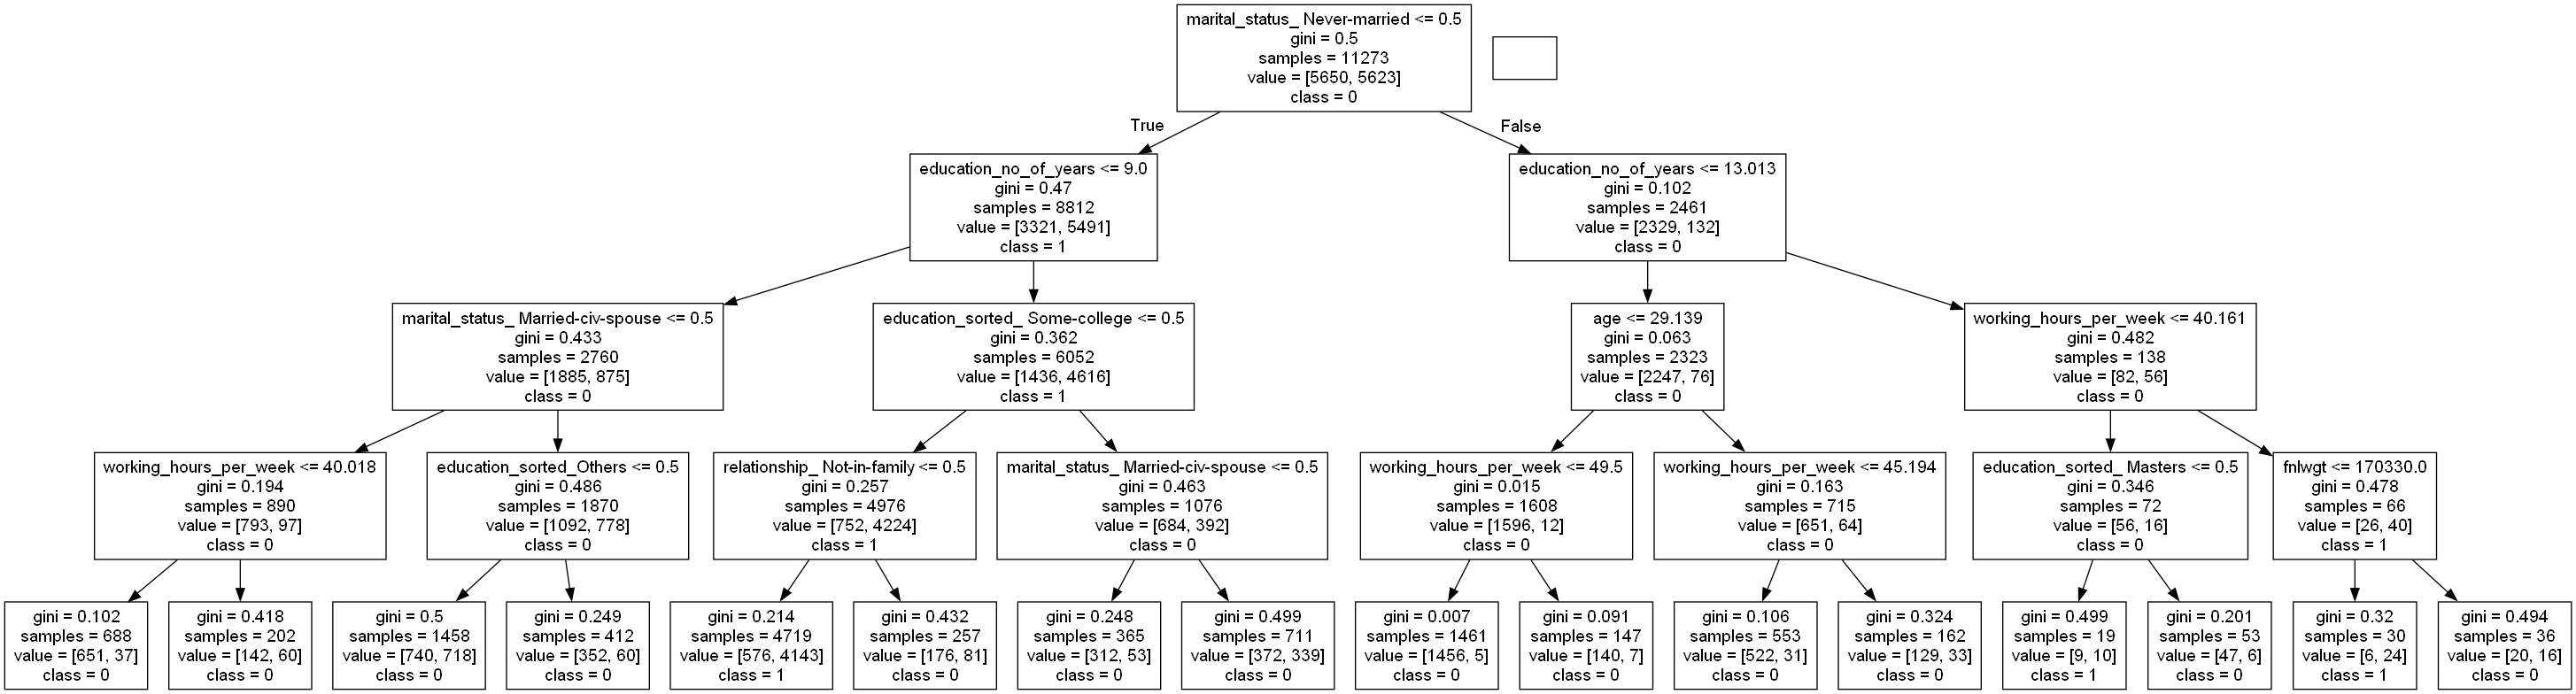

In [103]:
# plot decision tree

dot_data = tree.export_graphviz(dec3_tree, out_file=None, feature_names=X.columns,
                               class_names=["0", "1"])

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())


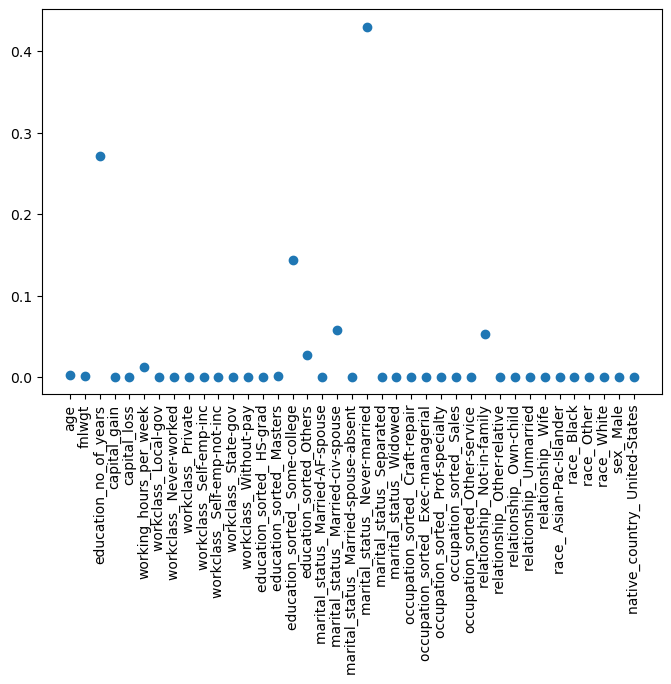

In [104]:
# Import the feature importance function

plt.figure(figsize = (8, 5))
plt.plot(dec3_tree.feature_importances_, "o")
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

 Based on the decision tree model and the corresponding plot, the top three factors that have the highest impact on a person's income are as follows:

1) Marital status: Individuals who are categorized as "never-married" tend to have a significant influence on their income.


2) Number of years of education completed: The level of education attained by an individual, as measured by the number of years completed, is a crucial factor in determining their income.


3) Highest level of education completed: Specifically, individuals who have attended "Some-College" as their highest level of education achieved tend to have a notable impact on their income.

## LOGISTIC REGRESSION MODEL VS DECISION TREE


- The logistic regression model outperformed the decision tree model in our analysis. The logistic regression model achieved an accuracy of 88.8% on the test data, with a recall of 85.8% and a precision of 90.3%. In contrast, the decision tree model achieved an accuracy of 82.9%, a recall of 75.8%, and a precision of 88.6%.


- According to our logistic regression model, the top three factors that have the greatest impact on income are age, number of years of education, and number of working hours per week.


- In our decision tree model, the top three factors influencing income are marital status (specifically, being never married), number of years of education, and attending some college as the highest level of education.

## Policy Framework for Income Prediction:


#### 1. Identifying Influential Factors:

   a. Age: Age has a significant impact on income as individuals typically gain more work experience and progress in their careers over time. Younger individuals may have lower incomes compared to those in their prime working years.
   
   b. Number of Working Hours per Week: The number of working hours per week directly affects income. Generally, individuals who work more hours have the potential to earn higher incomes.
   
   c. Number of Years of Education Completed: Education plays a crucial role in income determination. Higher levels of education often lead to better job opportunities and higher-paying positions.
   
   

#### 2. Data Analysis and Model Selection:

   Analyzing the dataset and considering the influential factors, a suitable predictive model for income prediction is logistic regression. Logistic regression is effective for binary classification tasks, such as predicting whether an individual's income is above or below a certain threshold.



#### 3. Policy Recommendations:

   a. Promote Lifelong Learning: Encourage individuals to continue their education and acquire higher levels of education. This can be achieved through scholarships, subsidized education programs, and vocational training initiatives.
  
  b. Flexible Working Arrangements: Facilitate flexible working arrangements to accommodate individuals' preferences and responsibilities, while ensuring fair compensation for working hours. This can include options for part-time work, remote work, or job-sharing.
  
  c. Support Career Advancement: Implement policies that support career progression and skill development. This can involve mentorship programs, professional development opportunities, and initiatives to bridge the skills gap in high-demand industries.
   

#### 4. Continuous Monitoring and Evaluation:

   Regularly monitor and evaluate the effectiveness of the policy framework by assessing changes in income levels, educational attainment, and employment patterns. Collect feedback from individuals and stakeholders to make necessary adjustments and improvements to the policies.
   
   